## Model 1 Revisited: Somewhat high correlation with price (corr > 0.3) for numerical columns

_This first model uses the information gained from the end of the Exploratory Data Analysis notebook, where I found the columns with correlation above 0.3. This model does not use any one hot encoded columns._

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

%matplotlib inline

In [3]:
train = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')

In [4]:
X = train[['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add',
           'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
           'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 
           'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF']]

y = train['SalePrice']

X_final = test[['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add',
                'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
                'Gr Liv Area',  'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
                'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
                'Open Porch SF']]

_Used PolynomialFeatures to create interaction terms within the features._

In [5]:
pf = PolynomialFeatures(degree = 2,include_bias = False)
pf.fit(X)

# Getting interaction and squared terms of the 
# X (both from the training and the test data sets))
X_poly = pf.transform(X)
X_final_poly = pf.transform(X_final)

In [6]:
# Creating a test-train-split here to split original features (not the poly features)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
# Test-train-splitting the poly features
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, 
                                                                        y, random_state = 42)

In [8]:
# Next step is to standardize the variables, 
# since we want to use regression regulation models in the next few steps.
ss = StandardScaler()

# Standardizing the original features
X_train_scale = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scale = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [9]:
# Standardizing the poly features. 
# Note: We need a new StandardScaler since we have different data
ss_poly = StandardScaler()
X_poly_train_scale = ss_poly.fit_transform(X_poly_train)
X_poly_test_scale = ss_poly.transform(X_poly_test)
X_final_scale = ss_poly.transform(X_final_poly)

In [10]:
# Using basic linear regression on the original data
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
lr_hat = lr.predict(X_test_scale)
lr.score(X_test_scale, y_test)

0.8568544150628054

###### _The linear regression with no regularization got a R2 score of 0.86, which is pretty high._

In [11]:
lr.coef_

array([ 1831.25129057, 27879.50162089,  4332.90358884,  7768.93212007,
        6387.51656098,  7730.55532774,  2998.00001872,  3942.08781969,
       15337.23383372,  -495.4342439 ,  4396.96317465,  5379.62546115,
        2088.49006928,  5084.06637308,  4332.54260837,  1999.16582746,
         -78.54397849])

_Although the regular linear regression model on the original matrix is a pretty good fit (with a R2 score of 0.84), I decided to use Lasso on the poly features maxtrix to see if I could achieve a better R2 score._

In [12]:
# Set up a list of Lasso alphas to check.
l_alphas = np.arange(.15,1,0.01)
# Generates values equally between 0.15 and 1 in steps of 0.01.

# Cross-validate over our list of Lasso alphas.
lasso_model = LassoCV(alphas = l_alphas)

# Fit model using best ridge alpha!
lasso_model = lasso_model.fit(X_poly_train_scale, y_poly_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [13]:
# Here is the optimal value of alpha
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

0.9400000000000007

In [14]:
# Instantiate model.
lasso_opt = Lasso(alpha = 0.94)

# Fit model.
lasso_opt.fit(X_poly_train_scale, y_poly_train)

# Generate predictions
lasso_opt_hat = lasso_opt.predict(X_poly_test_scale)
lasso_opt_hat_train = lasso_opt.predict(X_poly_train_scale)

# Evaluate model.
print(r2_score(y_poly_test, lasso_opt_hat))
print(r2_score(y_poly_train, lasso_opt_hat_train))

0.8674844462230207
0.9146912763132681


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


_With Lasso and the poly features matrix, I achieved a R2 score of 0.87 on the test data. This is a few points better than the regular linear regression on the original features matrix._

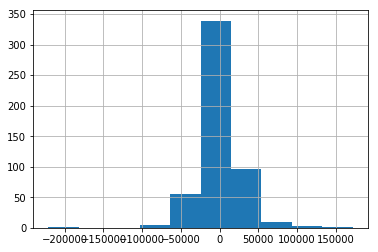

In [15]:
# Plotted the residuals of the prediction and the test
# Checking to see if the residuals are somewhat normal
residuals = y_poly_test - lasso_opt_hat
residuals.hist();

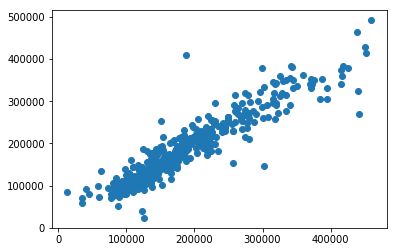

In [17]:
plt.scatter(y_poly_test, lasso_opt_hat)

_It seems the residuals are normal around mean of 0, with somewhat of a right skew. This could mean that the model is underpredicting due to outliers._

In [18]:
y_hat = lasso_opt.predict(X_final_scale)

In [19]:
submission = test[['Id']]
submission['SalePrice'] = y_hat
submission.to_csv('submission4.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
